In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns = ['age', 'year', 'nodes', 'status']
data=pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv",header=None, names=columns)
data.head()

In [ ]:
data.info()

In [ ]:
print(data["status"].value_counts())

# Preprocessing steps

Let's clear the clutter and mess before making a nose dive inside :P

1. Load Data
2. Check for null values
3. See if the dataset is balanced or unbalanced
4. check if there is any duplicate row
5. Delete duplicate rows

In [ ]:
subset=data[data.duplicated()] #find duplicate rows
print(subset)

In [ ]:
#delete duplicate rows
data=data.drop_duplicates()
subset=data[data.duplicated()]
print(subset)

## Understanding the Data
1. Retrieve the column name and understand the meaning of each column
2. Understand the End Goal
3. Since its a ML Problem is it a Regression or Classification Task?
4. Background Knowledge if required

In [ ]:
data.columns

In [ ]:
data["status"].unique()

### What lies in Haberman DataSet


Haberman's Dataset contains cases from study of survival of patients who had undergone the surgery of breast cancer between the year 1958 to 1970 at the University of Chicago's Billing Hospital



Features :

Age: This tells us the age of the patient at the time of operation

Year: This Tells us the Year in which patient had an operation

Status: Label Feature has value of 1,2 where 2 corresponds to the patient who survived for less than 5 years and 1 corresponds to patient who survived more than 5 years post operation.

Nodes: They are also known as Auxiliary lymph nodes their main function is to filter fluids before they are eventually released in the bloodstream, having cancer cells in Nodes tells us that the cancer might have spread to other parts of body as well.

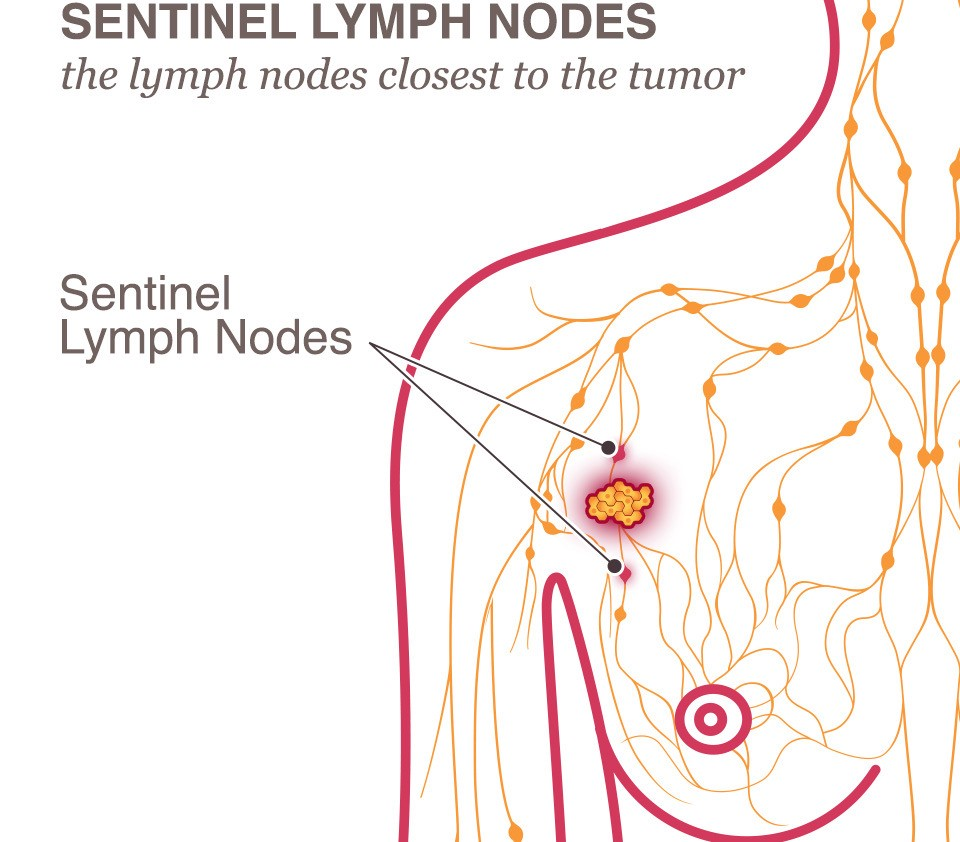

**Breast cancer initially develops as a lump in the breast, but often spreads to the axillary lymph nodes, which allows it to access the lymphatic system and travel to other areas of the body** [Source](/human-body-maps/axillary-lymph-nodes#1)

### Exploratory Data Analysis

1. Univariate analysis --> PDF, CDF, Boxplot, ViolinPlot
2. Bivariate Analysis -->Pair Plot, Scatter Plot
3. Multivariate Analysis--> Contours

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="status",height=5)\
.map(plt.scatter,"age","nodes")\
.add_legend()
plt.show()

In [ ]:
data.plot(kind="scatter",x="nodes",y="age")

Observations from Scatter Plots
- Maximum patients have  less than 10 nodes
- Patients who have the age of 40 to 60 might have higher number of nodes


Note: Higher number of nodes indicate cancer being spread to other parts of the body

In [ ]:
#sns.set_style("whitegrid")

sns.pairplot(data,hue="status",size=3, vars=['age','nodes','year'])
plt.show()

Pair plots are useful for exploring datasets where we have less number of features they give us insights to the underlying datasets by plotting features against one anaother in pairs

In the above line of code we get 9 pair plots the plots 1,3,5 are not of our present interest and we will explore them later they are histograms

Plots 2,3,6 and Plots 4,7,8 are same plots with their axes swapped so we can consider anyone from the two groups and it will give the same insights

#### Observations from plots 2,4,6

- Plot 2: ITs the same observation as we observed in scatter plots between age and nodes further analysis can be done using pdf and cdf 

- Plot 4: It is hard to seperate the two data classes when Age and Year are plotted against each other its not giving so much relevance so we will ignore this plot

- Plot 6: Again the two features here are overlapping so we would be ignoring them  p

# 1-D Scatter Plot

In [ ]:
import numpy as np

survived_longer=data.loc[data["status"]==1]
survived_low=data.loc[data["status"]==2]

plt.plot(survived_longer["nodes"],np.zeros_like(survived_longer["nodes"]),'o')

plt.plot(survived_low["nodes"],np.zeros_like(survived_low["nodes"]),'o')
plt.legend(["1-Survived more than 5 years","2- Survived less than 5 years"])
plt.show()

The values of 1D scatter plot are highly overlapping on top of each other so we cannot gather any meaningful information from this let's try understanding this with Histograms which is a variation of 1 D scatter plot

PDF and CDF to be precise which is a smoothed form of histogram

## Probability density Function

Probability density function is a smoothened form of histogram , In a histogram we have the feature we are interested in on the x axis and the count of that feature on the y axis

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="status",height=5)\
.map(sns.histplot,"age",kde=True)\
.add_legend()
plt.show()

### Observations from PDF of Age:
- The minimum age of patient is 30
- The maximum age of patient is slightly greater than 80
- The median age of patient is around 52

- The age group between 40 to 75 has nearly same survival and death chances so we cannot do further analysis using this feature

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="status",height=5)\
.map(sns.histplot,"year",kde=True)\
.add_legend()
plt.show()

### Observations from PDF of Year:

- This curve dosen't gives any insight and has a uniform density so we cannot use it for further analysis

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="status",size=10)\
.map(sns.distplot,"nodes")\
.add_legend()
plt.show()

### Observations from PDF of Auxiliary Nodes:
- If the number of nodes is 0 then patient survives more than 5 years
- If the number of nodes is less than or equal to 3 the patient has a high chance of survival of more than 5 years 


Let's Use CDF to find the exact percentage of people who will survive and who will not


In [ ]:
counts,bin_edges=np.histogram(survived_longer['nodes'],bins=20,density=True)
cn1,bins1=np.histogram(survived_low['nodes'],bins=20,density=True)
pdf=counts/sum(counts)
pdf_low=cn1/sum(cn1)
#print(pdf)
#print(pdf_low)
#print(bin_edges)
#print(bins1)

plt.figure(figsize=(20,10))
cdf=np.cumsum(pdf)
cdf_low=np.cumsum(pdf_low)

#pdf of high survival
plt.plot(bin_edges[1:],pdf) #pdf of high survival
plt.plot(bin_edges[1:],cdf)


plt.plot(bins1[1:],pdf_low) #pdf of low survival


plt.plot(bin_edges[1:],cdf_low)

plt.legend(["1- pdf of high survival of more than 5 years","2- CDF of high survival of more than 5 years","3- PDF of low survival of less than 5 years","4- CDF of low survival of less than 5 years"])
plt.show()

# Observations :
- There is a 74 % chance of survival is more than 5 years if the number of nodes detected is less than 3 
- There is a 100 % chance low survival if the number of nodes is greater than 40
- 38 % people who have less than 5 nodes have low chances of survival less than 5 years


#### Mean and Standard Deviation

In [ ]:
print(" Mean of number of nodes for people who survived more than 5 years is {}".format(np.mean(survived_longer.nodes)))
print(" Mean of number of nodes for people who survived more than 5 years with a outlier introduced is {}".format(np.mean(np.append(survived_longer.nodes,70))))
print(" STD of number of nodes for people who survived more than 5 years is {}".format(np.std(survived_longer.nodes)))


print(" Mean of number of nodes for people who survived less than 5 years is {}".format(np.mean(survived_low.nodes)))

print(" Mean of number of nodes for people who survived less than 5 years with a outlier introduced is {}".format(np.mean(np.append(survived_low.nodes,70))))
print(" STD of number of nodes for people who survived more less 5 years is {}".format(np.std(survived_low.nodes)))

### Observations from Mean and Standard Deviation:

- The spread of data in number of people who survived more than 5 years is less than the number of people who survived less than 5 years

- The mean of number of nodes for people who survived more than 5 years is low whereas the mean of number of nodes for people who survived more than 5 years is high, both the means change significantly when an outlier is introduced 

In [ ]:
print("Median of number of nodes for people who survived more than 5 years is {}".format(np.median(survived_longer.nodes)))
print(" Median of number of nodes for people who survived more than 5 years with a outlier introduced is {}".format(np.median(np.append(survived_longer.nodes,70))))


print("Median of number of nodes for people who survived less than 5 years is {}".format(np.median(survived_low.nodes)))

print("Median of number of nodes for people who survived less than 5 years with a outlier introduced is {}".format(np.median(np.append(survived_low.nodes,70))))


# Quantiles

print("\n Quantiles:")

print("\npercentiles of long survival are ",format(np.percentile(survived_longer.nodes,np.arange(0,100,25))))



print("\npercentiles of low survival are ",format(np.percentile(survived_low.nodes,np.arange(0,100,25))))



print("\n 90th percentile for long survival is",format(np.percentile(survived_longer.nodes,90)))




print("\n 90th percentile for long survival is",format(np.percentile(survived_low.nodes,90)))


### Observations from Median:
- The median for patients who survived longer is 1 and for those who survived low is 4 both the medians do not change even after the addition of outlier

### Observations from Quantiles:

- Nearly 50th% of nodes in long survival cases are 1 and 75th% is more than 3 indicating that remanining 25th% have more than 3 Auxiliary nodes


- 75th% of data in low survival cases have 11 nodes detected 

- At 90th% if number of nodes detected is more than >8 then high survival chance and if the number of nodes detected is >20 then low survival

In [ ]:
sns.boxplot(x=data.status,y=data.nodes)

### observations from Box Plot
- The 75th% of points from Long survival is nearly equal to 25th% of points of low survival
- Threshold of Long survival is from 0 to 8
- Threshold for Low survival is from0 to 25

If nodes between 0 to 7 in High Survival have an error then there is a high chance that even points from Low Survival lie in itwhich is almost 50% error in short survival



In [ ]:
sns.violinplot(x=data.status,y=data.nodes)

### Observations from ViolinPlot
- The spread of points in Long survival is more near 0 and that of Low survival is more near 2

- The whiskers of Long survival extend from 0 to 7 and that of low survival extend from 0 to 25

# Don't forget to upvote if you Liked this kernel would be updated further